## Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

## The Main aim is model will predict whether a loan would be approved or not.

## Libraries for Data Analysis

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import io
%cd "C:\Users\HP\Desktop\python\loan"

C:\Users\HP\Desktop\python\loan


## Datasets loading

In [10]:
train=pd.read_csv('train_ctrUa4K.csv')

In [11]:
test=pd.read_csv('test_lAUu6dG.csv')

## Finding the rows and columns in the train and test data

In [12]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


### checking the column names 

In [13]:
print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


###  In train and test data Loan ID is unique so drop that variable

In [14]:
train=train.drop(['Loan_ID'],axis=1)

In [15]:
test=test.drop(['Loan_ID'],axis=1)

In [16]:
## Here dependent variable is Loan_Status , So I seperated dependent variable in one variable 

In [17]:
y=train.Loan_Status

In [18]:
### To balance the train and test data drop the dependent variable from tarin data 

In [19]:
train=train.drop(['Loan_Status'],axis=1)

In [20]:
print(train.shape)
print(test.shape)

(614, 11)
(367, 11)


In [21]:
### Checking the Data types in train dataset

In [22]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [23]:
## checking the missing values in train data

In [24]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [25]:
## checking the missing values in test data

In [26]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [27]:
## combining the train and test data

In [28]:
comdf=pd.concat([train,test],axis=0)

In [29]:
comdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [30]:
## checking the missing values in combining data

In [31]:
comdf.isnull().sum().sort_values(ascending=False)

Credit_History       79
Self_Employed        55
LoanAmount           27
Dependents           25
Gender               24
Loan_Amount_Term     20
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [32]:
## checking the duplicate values in comdf variables

In [33]:
for i in comdf.columns:
    sas=comdf[i].value_counts(dropna=False)
    print(sas)

Male      775
Female    182
NaN        24
Name: Gender, dtype: int64
Yes    631
No     347
NaN      3
Name: Married, dtype: int64
0      545
1      160
2      160
3+      91
NaN     25
Name: Dependents, dtype: int64
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
No     807
Yes    119
NaN     55
Name: Self_Employed, dtype: int64
2500    13
5000    11
3333    10
3500     9
2600     8
        ..
4554     1
2499     1
3523     1
6333     1
9200     1
Name: ApplicantIncome, Length: 752, dtype: int64
0.0       429
2500.0      6
2083.0      5
2000.0      5
2333.0      5
         ... 
1229.0      1
1587.0      1
4600.0      1
688.0       1
2393.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64
120.0    29
NaN      27
110.0    27
100.0    24
187.0    21
         ..
218.0     1
62.0      1
53.0      1
242.0     1
197.0     1
Name: LoanAmount, Length: 233, dtype: int64
360.0    823
180.0     66
480.0     23
NaN       20
300.0     20
240.0      8
84.0       7
120.0

In [34]:
comdf.Gender=comdf.Gender.fillna(comdf.Gender.value_counts().idxmax())

In [35]:
comdf.Married=comdf.Married.fillna(comdf.Married.value_counts().idxmax())

In [36]:
comdf.Dependents=comdf.Dependents.fillna(comdf.Dependents.value_counts().idxmax())

In [37]:
comdf.Self_Employed=comdf.Self_Employed.fillna(comdf.Self_Employed.value_counts().idxmax())

In [38]:
comdf.LoanAmount=comdf.LoanAmount.fillna(comdf.LoanAmount).median()

In [39]:
comdf.Loan_Amount_Term=comdf.Loan_Amount_Term.fillna(comdf.Loan_Amount_Term).median()

In [40]:
comdf.Credit_History=comdf.Credit_History.fillna(comdf.Credit_History).median()

In [41]:
comdf.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:ylabel='Frequency'>

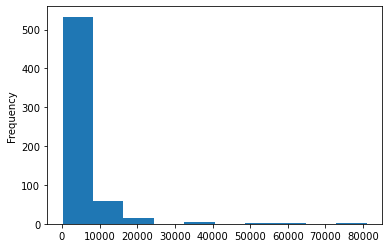

In [42]:
train.ApplicantIncome.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

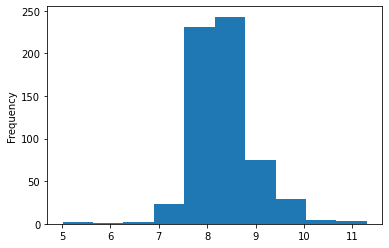

In [43]:
np.log(train.ApplicantIncome).plot(kind='hist')

<AxesSubplot:>

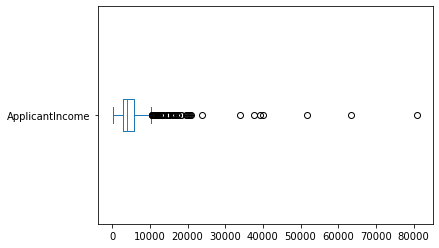

In [44]:
train.ApplicantIncome.plot(kind='box',vert=False)

<AxesSubplot:>

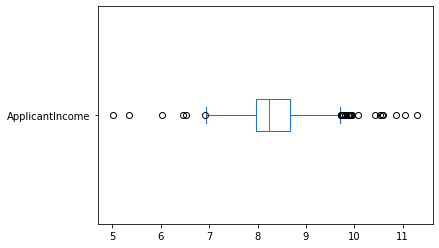

In [45]:
np.log(train.ApplicantIncome).plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

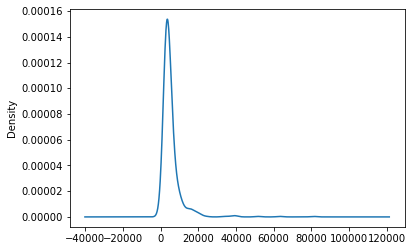

In [46]:
train.ApplicantIncome.plot(kind='density')

In [47]:
## checking the correlation in train data 

<AxesSubplot:>

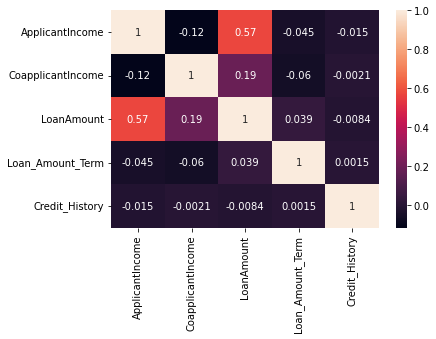

In [48]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True)

In [49]:
## their is no multicollinearity

In [50]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [51]:
comdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,126.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,126.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,126.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,126.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,126.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709.0,126.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393.0,126.0,360.0,1.0,Rural


In [52]:
train.shape

(614, 11)

In [53]:
test.shape

(367, 11)

In [54]:
comdf.shape

(981, 11)

In [55]:
## from comdf table separating the train and test data

In [56]:
trainc=comdf[0:614]

In [57]:
testc=comdf[615:981]

## Hypothesis Testing

In [58]:
trainc.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [59]:
trainc.ApplicantIncome.groupby(trainc.Gender).var()

Gender
Female    1.285496e+07
Male      4.265744e+07
Name: ApplicantIncome, dtype: float64

In [60]:
s=trainc[trainc.Gender=='Female']
a=trainc[trainc.Gender=='Male']

In [61]:
from scipy.stats import ttest_ind

In [62]:
ttest_ind(s.ApplicantIncome,a.ApplicantIncome,equal_var=False)

Ttest_indResult(statistic=-2.0798181188614193, pvalue=0.03839165635056259)

In [63]:
## Inttest p-value is <0.05 so rejects null hypothesis

In [64]:
trainc.ApplicantIncome.groupby(trainc.Property_Area).mean()

Property_Area
Rural        5554.083799
Semiurban    5292.261803
Urban        5398.247525
Name: ApplicantIncome, dtype: float64

In [65]:
q=trainc[trainc.Property_Area=='Rural']
w=trainc[trainc.Property_Area=='Semiurban']
r=trainc[trainc.Property_Area=='Urban']

In [66]:
from scipy.stats import f_oneway

In [67]:
f_oneway(q.ApplicantIncome,w.ApplicantIncome,r.ApplicantIncome)

F_onewayResult(statistic=0.09280511472442918, pvalue=0.9113839401724976)

In [68]:
pd.crosstab(trainc.Education,trainc.Property_Area)

Property_Area,Rural,Semiurban,Urban
Education,,,
Graduate,131,187,162
Not Graduate,48,46,40


In [69]:
from scipy.stats import chi2_contingency

In [70]:
chi2_contingency(pd.crosstab(trainc.Education,trainc.Property_Area))

(3.689929523749311,
 0.15803088950382604,
 2,
 array([[139.93485342, 182.14983713, 157.91530945],
        [ 39.06514658,  50.85016287,  44.08469055]]))

In [71]:
## Seperating the objectcolumns and numeric columns

In [72]:
objcols=comdf.select_dtypes(include='object')
numcols=comdf.select_dtypes(include=np.number)

In [73]:
print(objcols.shape)
print(numcols.shape)

(981, 6)
(981, 5)


In [74]:
## LabelEncoder is to convert object columns into numeric columns

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()

In [77]:
objdum=objcols.apply(le.fit_transform)

In [78]:
numcols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,126.0,360.0,1.0
1,4583,1508.0,126.0,360.0,1.0
2,3000,0.0,126.0,360.0,1.0
3,2583,2358.0,126.0,360.0,1.0
4,6000,0.0,126.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777.0,126.0,360.0,1.0
363,4158,709.0,126.0,360.0,1.0
364,3250,1993.0,126.0,360.0,1.0
365,5000,2393.0,126.0,360.0,1.0


In [79]:
## adding the numcols and objdummy columns

In [80]:
cleandata=pd.concat([numcols,objdum],axis=1)

In [81]:
## From cleandata separating the train data and test data

In [82]:
traincl=cleandata[0:614]

In [83]:
testcl=cleandata[615:981]

In [84]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [85]:
x=traincl

In [86]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,2
1,4583,1508.0,126.0,360.0,1.0,1,1,1,0,0,0
2,3000,0.0,126.0,360.0,1.0,1,1,0,0,1,2
3,2583,2358.0,126.0,360.0,1.0,1,1,0,1,0,2
4,6000,0.0,126.0,360.0,1.0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,126.0,360.0,1.0,0,0,0,0,0,0
610,4106,0.0,126.0,360.0,1.0,1,1,3,0,0,0
611,8072,240.0,126.0,360.0,1.0,1,1,1,0,0,2
612,7583,0.0,126.0,360.0,1.0,1,1,2,0,0,2


# Model building

## Logistic Regression 

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr=LogisticRegression(max_iter=400)

In [89]:
lrmodel=lr.fit(x,y)

In [90]:
lrmodel.score(x,y)

0.6889250814332247

In [91]:
lrpre=lrmodel.predict(x)

In [92]:
pd.crosstab(y,lrpre)

col_0,N,Y
Loan_Status,,
N,2,190
Y,1,421


In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y,lrpre))

              precision    recall  f1-score   support

           N       0.67      0.01      0.02       192
           Y       0.69      1.00      0.82       422

    accuracy                           0.69       614
   macro avg       0.68      0.50      0.42       614
weighted avg       0.68      0.69      0.57       614



In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
cross_val_score(lrmodel,x,y)

array([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459])

In [97]:
np.mean([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459])

0.687298414

In [98]:
from sklearn.metrics import plot_roc_curve

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


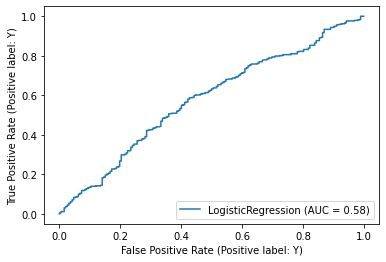

In [99]:
plot_roc_curve(lr,x,y)

In [100]:
lrtestpre=lrmodel.predict(testcl)

In [101]:
pd.DataFrame(lrtestpre).to_csv("lrmodel.csv")

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dc=DecisionTreeClassifier(max_depth=10)

In [104]:
dcmodel=dc.fit(x,y)

In [105]:
dcmodel.score(x,y)

0.8664495114006515

In [106]:
dcpre=dcmodel.predict(x)

In [107]:
pd.crosstab(y,dcpre)

col_0,N,Y
Loan_Status,,
N,121,71
Y,11,411


In [108]:
print(classification_report(y,dcpre))

              precision    recall  f1-score   support

           N       0.92      0.63      0.75       192
           Y       0.85      0.97      0.91       422

    accuracy                           0.87       614
   macro avg       0.88      0.80      0.83       614
weighted avg       0.87      0.87      0.86       614



In [109]:
cross_val_score(dcmodel,x,y)

array([0.6097561 , 0.66666667, 0.64227642, 0.59349593, 0.63934426])

In [110]:
np.mean([0.61788618, 0.69105691, 0.64227642, 0.59349593, 0.63934426])

0.6368119400000001

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


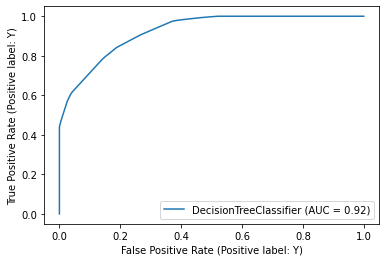

In [111]:
plot_roc_curve(dc,x,y)

In [112]:
dctestpre=dcmodel.predict(testcl)

In [113]:
pd.DataFrame(dctestpre).to_csv("dcmodel.csv")

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rc=RandomForestClassifier(max_depth=9,n_estimators=50)

In [116]:
rcmodel=rc.fit(x,y)

In [117]:
rcmodel.score(x,y)

0.8697068403908795

In [118]:
rcpre=rcmodel.predict(x)

In [119]:
pd.crosstab(y,rcpre)

col_0,N,Y
Loan_Status,,
N,112,80
Y,0,422


In [120]:
print(classification_report(y,rcpre))

              precision    recall  f1-score   support

           N       1.00      0.58      0.74       192
           Y       0.84      1.00      0.91       422

    accuracy                           0.87       614
   macro avg       0.92      0.79      0.83       614
weighted avg       0.89      0.87      0.86       614



In [121]:
cross_val_score(rcmodel,x,y)

array([0.68292683, 0.73170732, 0.67479675, 0.64227642, 0.6557377 ])

In [122]:
np.mean([0.69918699, 0.69105691, 0.69105691, 0.66666667, 0.69672131])

0.688937758

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


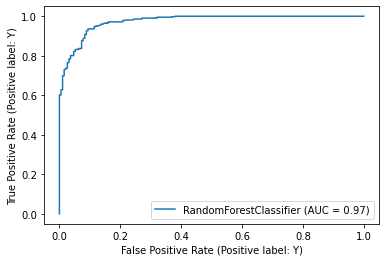

In [123]:
plot_roc_curve(rc,x,y)

In [124]:
rctestpre=rcmodel.predict(testcl)

In [125]:
pd.DataFrame(rctestpre).to_csv("rcmodel.csv")

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
gc=GradientBoostingClassifier(n_estimators=40)

In [128]:
gcmodel=gc.fit(x,y)

In [129]:
gcmodel.score(x,y)

0.755700325732899

In [130]:
gcpre=gcmodel.predict(x)

In [131]:
pd.crosstab(y,gcpre)

col_0,N,Y
Loan_Status,,
N,43,149
Y,1,421


In [132]:
print(classification_report(y,gcpre))

              precision    recall  f1-score   support

           N       0.98      0.22      0.36       192
           Y       0.74      1.00      0.85       422

    accuracy                           0.76       614
   macro avg       0.86      0.61      0.61       614
weighted avg       0.81      0.76      0.70       614



In [133]:
cross_val_score(gcmodel,x,y)

array([0.6504065 , 0.67479675, 0.70731707, 0.65853659, 0.71311475])

In [134]:
np.mean([0.6504065 , 0.67479675, 0.70731707, 0.65853659, 0.71311475])

0.6808343319999999

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


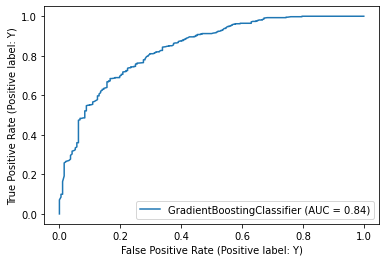

In [135]:
plot_roc_curve(gc,x,y)

In [136]:
gctestpre=gcmodel.predict(testcl)

In [137]:
pd.DataFrame(gctestpre).to_csv("gcmodel.csv")

## After predicting the test data in analytics vidya ,Logistic Regression is best fit model